# Tokenizing and extracting keywords

In [2]:
import spacy, pandas, networkx, matplotlib.pyplot as plt

In [3]:
from spacy.matcher import Matcher
from operator import itemgetter

In [4]:
from collections import Counter

### Loading model and reading the document


In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
inputtext = ""
for i in range(1,20):
    file_name =f"{i}.txt"
    #print(file_name)
    inputtext+=(open(file_name).read())

In [7]:
inputtext

'The Airports Authority of India (AAI) has handed over the Mangaluru airport to the Adani group on lease for a period of 50 years, according to an official statement.\nThe central government in February 2019 had privatised six major airports of the country like Lucknow, Ahmedabad, Jaipur, Mangaluru, Thiruvananthapuram, and Guwahati. After a competitive bidding process, the Adani group won the rights to run all of them.\n"In accordance to concession agreement executed on February 14, 2020, AAI handed over handling of Mangaluru airport to AdaniOnline on lease for 50 yrs. Exchange of symbolic key held at midnight 00:00 hrs on October 30, 2020," the AAI said on Twitter.\nThe AAI had signed concession agreements with the Adani group on February 14 for operations, management and development of the Mangaluru, Lucknow and Ahmedabad airports.\nOn October 22, the AAI had said in a press release that the Adani group would be taking over the airports at Mangaluru, Lucknow and Ahmedabad by October 

In [8]:
#file_name = '20.txt'
#input_text = open(file_name).read()
#print(type(input_text))
input_doc = nlp(inputtext)

### Sentence Segmentation

In [9]:
sentences = list(input_doc.sents)

In [10]:
sentences

[The Airports Authority of India (AAI) has handed over the Mangaluru airport to the Adani group on lease for a period of 50 years, according to an official statement.,
 The central government in February 2019 had privatised six major airports of the country like Lucknow, Ahmedabad, Jaipur, Mangaluru, Thiruvananthapuram, and Guwahati.,
 After a competitive bidding process, the Adani group won the rights to run all of them.,
 "In accordance to concession agreement executed on February 14, 2020, AAI handed over handling of Mangaluru airport to AdaniOnline on lease for 50 yrs.,
 Exchange of symbolic key held at midnight 00:00 hrs on October 30, 2020," the AAI said on Twitter.,
 The AAI had signed concession agreements with the Adani group on February 14 for operations, management and development of the Mangaluru, Lucknow and Ahmedabad airports.,
 On October 22, the AAI had said in a press release that the Adani group would be taking over the airports at Mangaluru, Lucknow and Ahmedabad by 

### Visualizing dependencies and entities in text

In [11]:
from spacy import displacy

options = {"compact": True,"fine_grained":True, "ents":["EVENT","PERSON","LOC","ORDINAL","CARDINAL","ORG"]}
displacy.render(sentences, style='dep', jupyter=True,options = options)


In [12]:
displacy.render(sentences, style='ent', jupyter=True)

/home/lekha/venv/lib/python3.6/site-packages/spacy/displacy/__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


### Extracting entities from document

In [13]:
def getEntities(sentence):
    ent1 = ""
    ent2 = ""
    prev_dep = ""
    prev_token = ""
    prefix = ""
    modifier = ""
    
    for tok in nlp(sentence):
        if not tok.is_punct:
            if tok.dep_ == "compound":
                prefix = tok.text
                if prev_dep == "compound":
                    prefix = prev_token + " " + tok.text
            if tok.dep_.endswith("mod") == True:
                modifier = tok.text
                if prev_dep == "compound":
                    modifier = prev_token + " " + tok.text
                
            #adding subject
            if tok.dep_.find("subj") == True:
                ent1 = modifier + " "+ prefix + " "+tok.text
                #reset everything
                prefix = ""
                modifier = ""
                prev_dep = ""
                prev_token = ""
            
            #adding object
            if tok.dep_.find("obj") == True:
                ent2 = modifier + " " + prefix + " "+ tok.text
                
            #updating variables
            prev_dep = tok.dep_
            prev_token = tok.text
            
    return [ent1.strip(), ent2.strip()]

In [14]:
getEntities("I watched a film") #checking if it works fine

['I', 'film']

In [15]:
entity_pairs = []
for s in sentences:
    entity_pairs.append(getEntities(str(s)))

In [16]:
entity_pairs

[['Airports Authority', 'official Adani statement'],
 ['central  government', 'major  Lucknow'],
 ['competitive Adani group', 'them'],
 ['2020 concession AAI', '50 Mangaluru yrs'],
 ['2020  AAI', 'Twitter'],
 ['AAI', 'Mangaluru Adani airports'],
 ['Adani group', 'October'],
 ['concession agreements', 'three  September'],
 ['China', 'industrial development security'],
 ['plenary  session', 'Five Year Plan'],
 ['domestic exports Vision', 'long development Xi'],
 ['he', '15  years'],
 ['Xi', 'long CPC General tenure'],
 ['5year term which', 'life'],
 ['president', 'greater Coronavirus pandemic'],
 ['general vitamin people', 'natural sunshine sunlight'],
 ['new  study', 'vitamin D vitamin deficiency'],
 ['Vitamin D', 'weak bodily bones'],
 ['80 Clinical percent', 'COVID-19  Spain'],
 ['also  men', 'lower vitamin D women'],
 ['COVID-19 Vitamin patients', 'longer hospital stay'],
 ['Jose L. Hernandez', 'Santander'],
 ['vitamin D sufficiency', 'COVID-19 treatment process'],
 ['Vitamin D', 'al

### Extracting relations

In [17]:
def getRelation(sentence):
    doc = nlp(sentence)
    matcher = Matcher(nlp.vocab)
    
    pattern = [{'DEP':'ROOT'},
              {'DEP':'prep','OP':"?"},
              {'DEP':'agent','OP':"?"},  
              {'POS':'ADJ','OP':"?"}]
    
    matcher.add("matching_1",None, pattern) #match id
    matches = matcher(doc)
    k = len(matches) -1
    span = doc[matches[k][1]:matches[k][2]]
    
    return span.text

In [18]:
getRelation("I watched a film") #checking

'watched'

In [19]:
relations = [getRelation(str(s)) for s in sentences]

In [20]:
relations

['handed',
 'privatised',
 'won',
 'handed',
 'said on',
 'signed',
 'said in',
 'signed between',
 'said on',
 'adopted',
 'visualises',
 'sparked',
 'emerged as',
 'removed',
 'is due',
 'raised',
 'discovered',
 'known',
 'found',
 'noticed',
 'had',
 'wrote',
 'claimed',
 'known as',
 'help',
 'said on',
 'chased',
 'name',
 'added',
 'opened',
 'suspended in',
 'raised to',
 'hosted',
 'allowed',
 'announced on',
 'reopen',
 'allowed from',
 'allowed from',
 'allow',
 'have',
 'increased',
 'include',
 'said',
 'added',
 'allowed',
 'resume from',
 'resume in',
 'contracted',
 'reopened rural',
 'permitted',
 'slipped',
 'impressed by',
 'crooned',
 'noticed',
 'sang',
 'gone viral',
 'posted with',
 'is',
 'Let',
 'applauded',
 'is popular',
 'is',
 'got',
 'bought',
 'installed',
 'suggest',
 'went viral',
 'gave',
 'witnessed',
 'was more',
 'told regional',
 'spent',
 'is',
 'loved',
 'said',
 'salute',
 'posted',
 'noticed',
 'picked',
 'fed',
 'freed',
 'is',
 'collected sev

In [21]:
print(Counter(relations)) #just to see the most common relations

Counter({'said': 22, 'is': 13, 'said on': 3, 'noticed': 3, 'wrote': 3, 'added': 3, 'taken': 3, 'discussed': 3, 'took to': 3, 'handed': 2, 'said in': 2, 'had': 2, 'known as': 2, 'allowed': 2, 'allowed from': 2, 'got': 2, 'went viral': 2, 'posted': 2, 'alleged': 2, 'arrested': 2, 'were': 2, 'tweeted': 2, 'reports': 2, 'shared': 2, 'privatised': 1, 'won': 1, 'signed': 1, 'signed between': 1, 'adopted': 1, 'visualises': 1, 'sparked': 1, 'emerged as': 1, 'removed': 1, 'is due': 1, 'raised': 1, 'discovered': 1, 'known': 1, 'found': 1, 'claimed': 1, 'help': 1, 'chased': 1, 'name': 1, 'opened': 1, 'suspended in': 1, 'raised to': 1, 'hosted': 1, 'announced on': 1, 'reopen': 1, 'allow': 1, 'have': 1, 'increased': 1, 'include': 1, 'resume from': 1, 'resume in': 1, 'contracted': 1, 'reopened rural': 1, 'permitted': 1, 'slipped': 1, 'impressed by': 1, 'crooned': 1, 'sang': 1, 'gone viral': 1, 'posted with': 1, 'Let': 1, 'applauded': 1, 'is popular': 1, 'bought': 1, 'installed': 1, 'suggest': 1, 'ga

# Graph Construction

In [22]:
source = [i[0] for i in entity_pairs]
target = [i[1] for i in entity_pairs]
    
s_graph = pandas.DataFrame({'source' : source, 'target' : target, 'edge': relations})

In [23]:
G=networkx.from_pandas_edgelist(s_graph, "source", "target", 
                          edge_attr=True, create_using=networkx.MultiDiGraph())

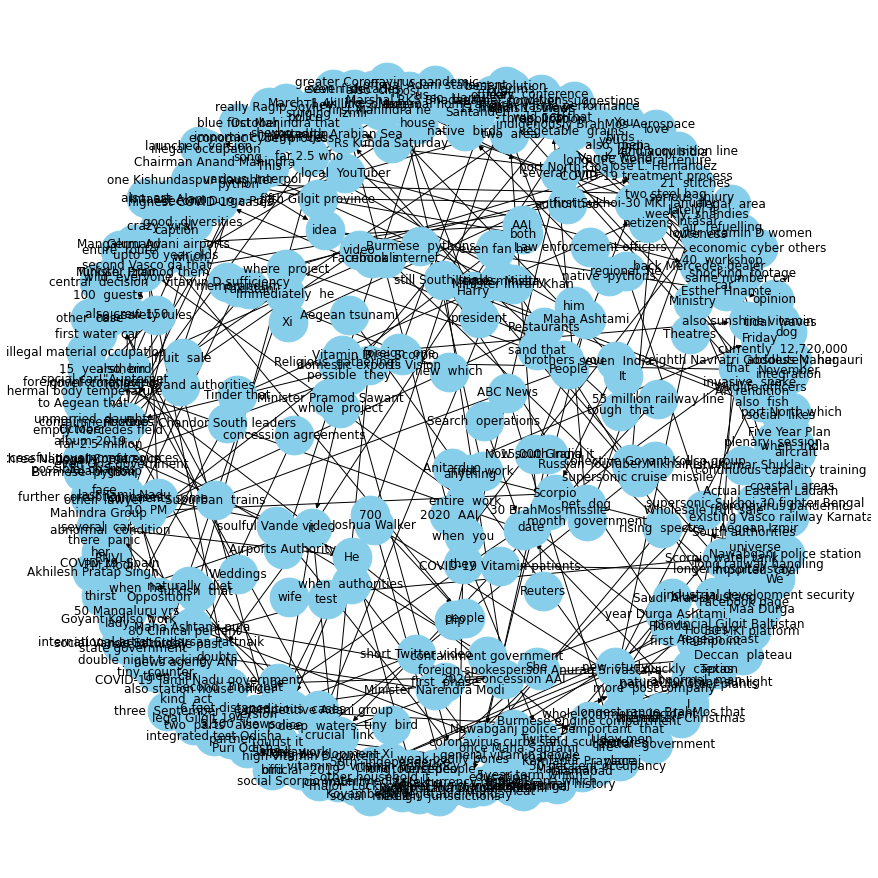

In [24]:
plt.figure(figsize=(12,12))

pos = networkx.spring_layout(G,k=0.5)
networkx.draw(G, with_labels=True, node_color='skyblue', node_size =1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [25]:
G2 = networkx.DiGraph(G)
eigenvector_dict = networkx.eigenvector_centrality(G2,max_iter=1500) # Run eigenvector centrality
networkx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_deg = sorted(eigenvector_dict.items(),key=itemgetter(1),reverse=True)
for d in sorted_deg:
    print(d)

('vegetable  grains', 0.2855612249050036)
('same number car', 0.2855612249050036)
('bird', 0.2855612249050036)
('illegal material occupation', 0.2855612249050036)
('education', 0.2855612249050036)
('doubts', 0.2855612249050036)
('face', 0.2855612249050036)
('community', 0.2855612249050036)
('novel  coronavirus', 0.2855612249050036)
('eighth Navratri Goddess Mahagauri', 0.2855612249050036)
('coronavirus pandemic', 0.14315050547267635)
('upto 50 year olds', 0.14315050547267635)
('good  diversities', 0.14315050547267635)
('Mahindra Group', 0.14315050547267635)
('two steel bag', 0.14315050547267635)
('invasive  snake', 0.14315050547267635)
('currently  12,720,000', 0.14315050547267635)
('opinion', 0.14315050547267635)
('40  workshop', 0.14315050547267635)
('Saturday', 0.002215544790943551)
('it', 0.0014776654156465076)
('Scorpio water tank', 0.0014776654156465076)
('Facebook page', 0.0014776654156465076)
('', 0.0014776654156465076)
('Texas', 0.0014776654156465076)
('official Adani statemen

In [26]:
degree_dict = dict(G.degree(G.nodes()))
networkx.set_node_attributes(G, degree_dict, 'degree')


In [27]:
sorted_degree = sorted(degree_dict.items(),key=itemgetter(1) ,reverse=True)

In [28]:
for d in sorted_degree:
    print(d)

('it', 9)
('He', 6)
('he', 4)
('', 4)
('Saturday', 3)
('Scorpio water tank', 3)
('car', 3)
('Vitamin D', 2)
('that', 2)
('people', 2)
('video', 2)
('us', 2)
('Scorpio', 2)
('idea', 2)
('officers', 2)
('police', 2)
('they', 2)
('Facebook page', 2)
('python', 2)
('Joshua Walker', 2)
('Texas', 2)
('I', 2)
('Maha Ashtami', 2)
('Airports Authority', 1)
('official Adani statement', 1)
('central  government', 1)
('major  Lucknow', 1)
('competitive Adani group', 1)
('them', 1)
('2020 concession AAI', 1)
('50 Mangaluru yrs', 1)
('2020  AAI', 1)
('Twitter', 1)
('AAI', 1)
('Mangaluru Adani airports', 1)
('Adani group', 1)
('October', 1)
('concession agreements', 1)
('three  September', 1)
('China', 1)
('industrial development security', 1)
('plenary  session', 1)
('Five Year Plan', 1)
('domestic exports Vision', 1)
('long development Xi', 1)
('15  years', 1)
('Xi', 1)
('long CPC General tenure', 1)
('5year term which', 1)
('life', 1)
('president', 1)
('greater Coronavirus pandemic', 1)
('general 